Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2022/2023  
http://www.fer.unizg.hr/predmet/map

### Druga laboratorijska vježba - Analiza glavnih komponenti, Faktorska analiza, Multivarijatna linearna regresija, Kanonička korelacijska analiza

**Rok za predaju: 7. svibnja 2023. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. **Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [1]:
!pip install linearmodels
!pip install factor-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 42.9 MB/s eta 0:00:00
  Created wheel for factor

In [2]:
# Učitajte sve potrebne biblioteke
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from linearmodels.panel import PanelOLS
from linearmodels.iv import IV2SLS
from linearmodels import SUR
from sklearn.cross_decomposition import CCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import chi2

### 0. Podatkovni skup

U laboratorijskoj vježbi razmatra se dinamika cijena vrijednosnica na financijskim tržištima. Dane su povijesne tjedne cijene ETF-ova (eng. exchange traded fund) koji prate određene dioničke, obvezničke ili druge indekse. Konkretno, radi se o sljedeća 22 fonda:

- `AGG` (iShares Core U.S. Aggregate Bond ETF) - obveznice s američkog tržišta,
- `IEF` (iShares 7-10 Year Treasury Bond ETF) - srednjeročne državne obveznice,
- `LQD` (iShares iBoxx $ Investment Grade Corporate Bond ETF) - korporativne obveznice,
- `SHY` (iShares 1-3 Year Treasury Bond ETF) - kratkoročne državne obveznice,
- `TIP` (iShares TIPS Bond ETF) - državne obveznice zaštićene od inflacije,
- `TLT` (iShares 20+ Year Treasury Bond ETF) - dugoročne državne obveznice,
- `DBC` (Invesco DB Commodity Index Tracking Fund) - sirovine i roba,
- `GLD` (SPDR Gold Trust) - zlato,
- `USO` (United States Oil Fund) - nafta,
- `IJH` (iShares Core S&P Mid-Cap ETF) - dionice tvrtki s američkog tržišta,
- `IWM` (iShares Russell 2000 ETF) - dionice američkih tvrtki s malim kapitalom,
- `SPY` (SPDR S&P 500 ETF Trust) - dionice tvrtki s američkog tržišta,
- `VTV` (Vanguard Value ETF) - dionice tvrtki s američkog tržišta,
- `XLB` (Materials Select Sector SPDR Fund) - dionice tvrtki za materijale,
- `XLE` (Energy Select Sector SPDR Fund) - dionice tvrtki energetskog sektora,
- `XLF` (Financial Select Sector SPDR Fund) - dionice tvrtki financijskog sektora,
- `XLI` (Industrial Select Sector SPDR Fund) - dionice tvrtki industrijskog sektora,
- `XLK` (Technology Select Sector SPDR Fund) - dionice tvrtki iz tehnološkog sektora,
- `XLP` (Consumer Staples Select Sector SPDR Fund) - dionice tvrki za necikličku potrošačku robu,
- `XLU` (Utilities Select Sector SPDR Fund) - dionice tvrtki komunalnih djelatnosti,
- `XLV` (Health Care Select Sector SPDR Fund) - dionice tvrtki iz zdravstvenog sektora,
- `XLY` (Consumer Discretionary Select Sector SPDR Fund) - dionice tvrtki za cikličku potršačku robu,
- `IYR` (iShares U.S. Real Estate ETF) - dionice tvrtki iz područja nekretnina,
- `VNQ` (Vanguard Real Estate Index Fund) - dionice tvrtki iz područja nekretnina.

Pri modeliranju zajedničkog kretanja i rizika vrijednosnica, najčešće se koriste povrati: $R(t) = \frac{S(t)-S(t-1)}{S(t-1)},$ gdje je $S(t)$ cijena vrijednosnice u trenutku (tjednu) $t$. 

#### (a)
Podaci se nalaze u datoteci "ETFprices.csv". Učitajte ih, provjerite ispravnost, izračunajte tjedne povrate te vizualizirajte matricu korelacije povrata. U ostatku laboratorijske vježbe također koristite povrate, a ne cijene. 

In [3]:
etf=pd.read_csv("ETFprices.csv", index_col=None)
returns=pd.DataFrame()
returns['time']=etf['Time']
pom=etf.drop(['Time'], axis=1)

for col in pom.columns:
  previous_prices = etf[col].shift(1)
  returns_col = (etf[col] - previous_prices) / previous_prices
  returns[col] = returns_col

returns = returns.dropna()
returns.head()

,time,AGG,IEF,LQD,SHY,TIP,TLT,DBC,GLD,USO,...,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,IYR,VNQ
1,16-Apr-2006 00:00:00,0.000203,0.005468,0.004609,0.001380,0.009790,0.004263,0.043513,0.062185,0.057977,...,0.070417,0.019704,0.030419,-0.001810,0.006879,0.033399,0.004513,0.002083,0.034792,0.035294
2,23-Apr-2006 00:00:00,0.003258,-0.001113,0.000191,0.000877,-0.001499,-0.007547,-0.019893,0.029905,-0.043813,...,-0.043522,0.025363,-0.010318,-0.009520,0.017506,0.002240,-0.005456,0.012475,-0.003922,-0.005909
3,30-Apr-2006 00:00:00,-0.002292,-0.003428,-0.002763,-0.000088,-0.002063,-0.002744,0.003122,0.044554,-0.023269,...,0.030102,0.005889,0.033304,0.003204,0.009651,0.027459,-0.006776,0.015254,0.007032,0.006401
4,07-May-2006 00:00:00,-0.003675,-0.004860,-0.001926,0.000000,0.001009,-0.011363,0.044747,0.046036,0.016324,...,-0.036018,-0.028103,-0.021020,-0.042884,-0.016209,-0.028589,-0.012671,-0.015024,-0.032402,-0.030592
5,14-May-2006 00:00:00,0.006660,0.009518,0.007232,0.001632,0.005337,0.021536,-0.053259,-0.077897,-0.051223,...,-0.047938,-0.018072,-0.025479,-0.018112,-0.002112,-0.005438,-0.003620,-0.012027,-0.014579,-0.014372


<ipython-input-4-7f924d0e673a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = returns.corr()


<Axes: >

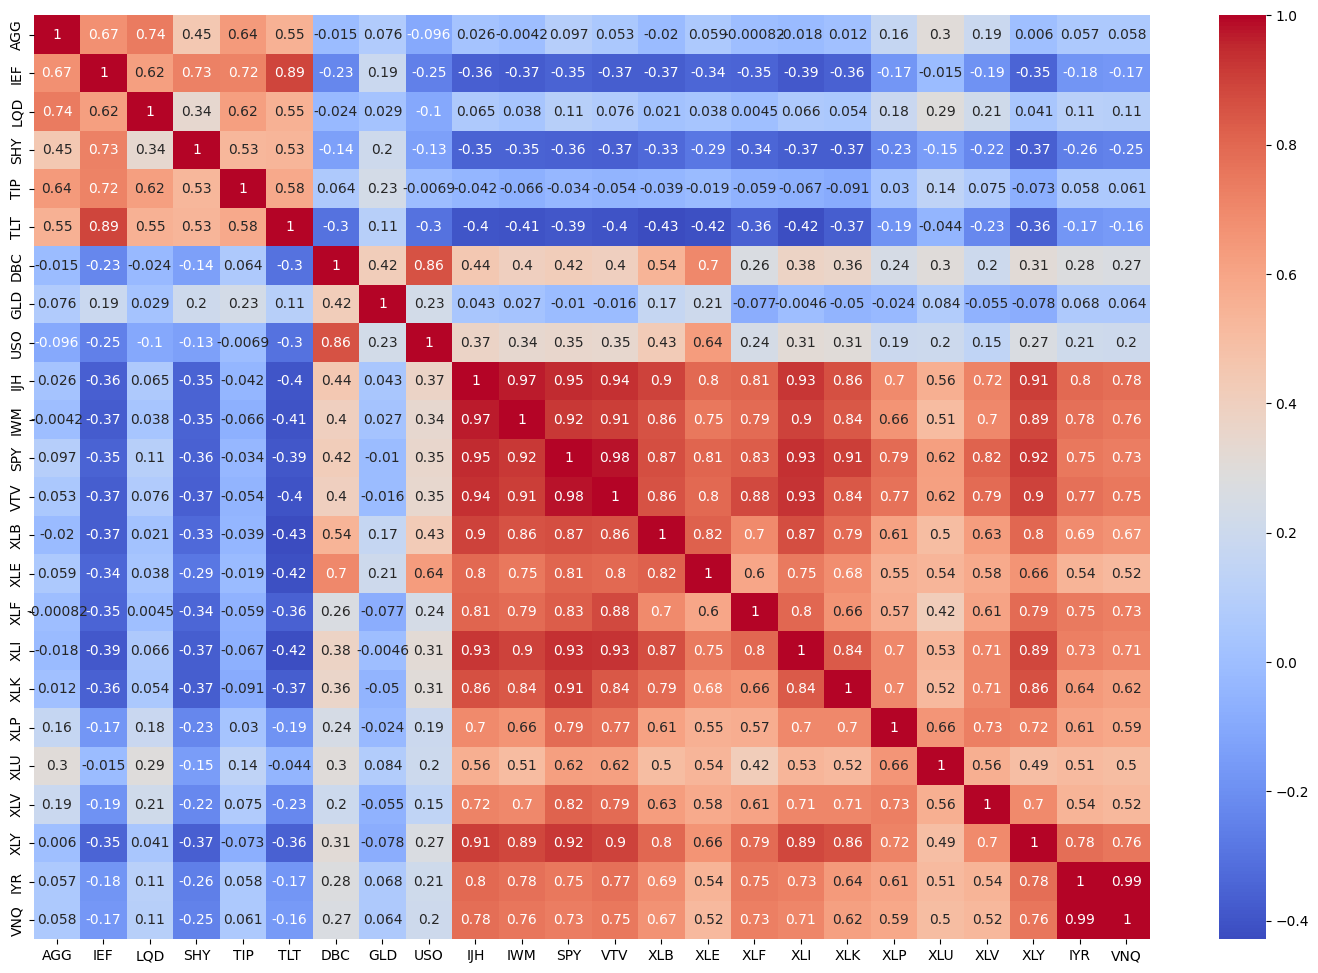

In [4]:
corr_matrix = returns.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

### 1. Analiza glavnih komponenti

#### (a) 
Izračunajte glavne komponente matrice korelacije i izračunajte koliki udio varijance objašnjavaju. Odredite broj glavnih komponenti. 

In [26]:
pca = PCA() 
pca.fit(corr_matrix)
pca_corr_matrix = pca.transform(corr_matrix)
explained_var = pca.explained_variance_ratio_

print("Ima "+str(len(explained_var))+" glavnih komponenti a ovo je udio varijance koji objašnjavaju:")
print(explained_var)

Ima 24 glavnih komponenti a ovo je udio varijance koji objašnjavaju:
[8.90139697e-01 6.75397378e-02 1.51649948e-02 7.85729439e-03
 6.06004402e-03 4.53264846e-03 2.29609206e-03 1.54880716e-03
 1.38303954e-03 9.64181284e-04 7.39199107e-04 6.09661805e-04
 4.47820214e-04 1.78980519e-04 1.51479258e-04 1.22567261e-04
 1.07780545e-04 6.78354060e-05 6.30250792e-05 1.90627707e-05
 4.87318868e-06 9.28321141e-07 2.49731291e-07 3.00098973e-33]


#### (b)
Komponente PCA će u financijama često opisivati neke zajedničke faktore u podatcima, što je moguće analizirati promatranjem pojedinih elemenata svojstvenih vektora. Ako je neki element određenog svojstvenog vektora velik po magnitudi (pozitivan ili negativan), to znači da ta komponenta opisuje odgovarajuću vrijednosnicu i objašnjava njenu varijancu, za razliku od slučaja kad je element blizu 0, što znači da razmatrana vrijednosnica ne ovisi previše o toj komponenti. Grafički prikažite i usporedite koeficijente prvih nekoliko komponenti.

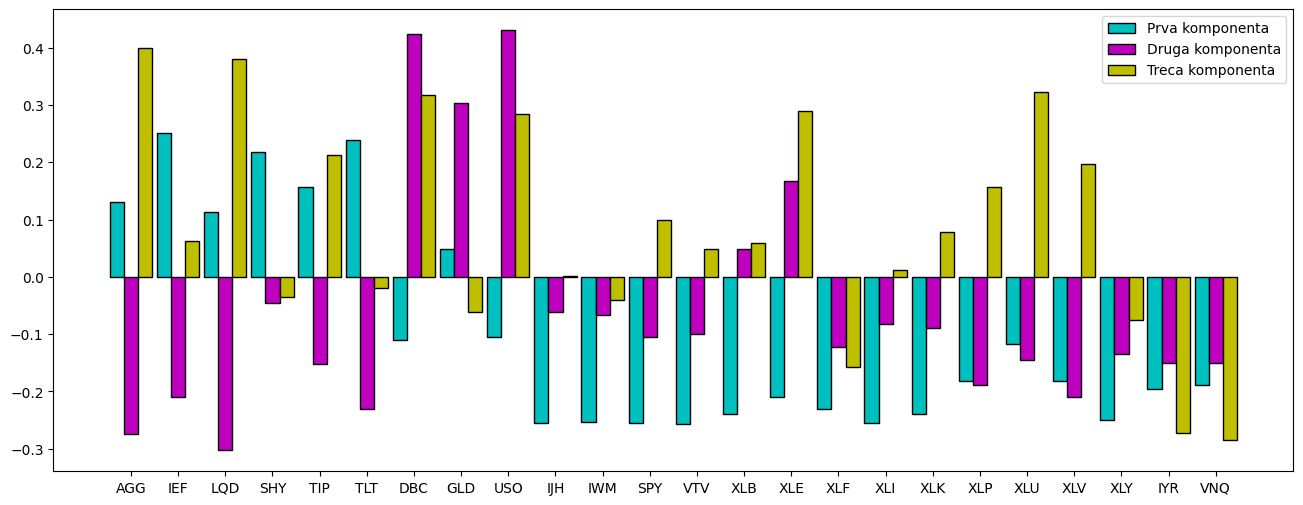

In [27]:
components = pca.components_
X=np.array(range(1,25))
plt.figure(figsize=(16, 6))
plt.bar(X-0.3, components[0], label="Prva komponenta", color='c', edgecolor='black', width=0.3)
plt.bar(X, components[1], label="Druga komponenta", color='m', edgecolor='black',width=0.3)
plt.bar(X+0.3, components[2], label="Treca komponenta", color='y', edgecolor='black',width=0.3)
plt.xticks(range(1, 25), returns.columns[1:])
plt.legend()
plt.show()

Na drugu komponentu jako utječu sirovine:GLD; USO i DBC.

Na prvu komponentu pozitivno utjecu obveznice a negativno dionice.

Na trecu komponentu najvis epozitivno utjecu obveznice ali i dionice iz djelatnisti namjenjienih ljudima(komunalne i zdravstvo).

#### (c) 
Prikažite graf raspršenja prve dvije glavne komponente i proučite možete li primijetiti neke zanimljive grupe. 


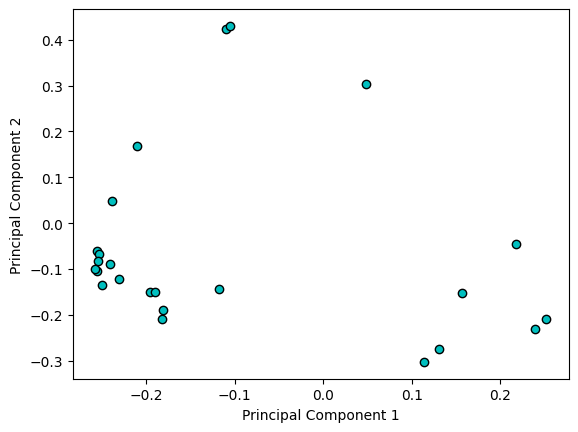

In [7]:
plt.scatter(components[0], components[1], c='c', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### (d)
U primjeni PCA i svojstvenoj dekompoziciji kovarijance u financijama, svojstveni vektori se često zovu i tzv. svojstveni portfelji. Općenito, portfelj je vektor $w = [w_1,...,w_N]$ u kojem svaki element predstavlja težinu ili udio kapitala u određenoj vrijednosnici. Često je dobro pomnožiti njihove težine s predznakom njihove sume - na taj način zapravo samo "okrećemo" predznak svojstvenog vektora tako da mu je suma pozitivna (konačni PCA rastav je i dalje isti ako svojstveni vektor pomnožimo s -1). Također, dobro je i skalirati svojstvene portfelje sa sumom njihovih apsolutnih vrijednosti:
$\tilde{w}_i = \frac{w_i}{\sum_j^N{\vert w_j \vert}}$.
Na taj način se osigurava da visoke magnitude pojedinih elemenata ne uzrokuju velike razlike u volatilnostima svojstvenih portfelja.
Ukoliko znamo povrate $R\in\mathbb{R}^{T\times N}$ (gdje je $R_i\in\mathbb{R}^{T}$ vektor povrata za vrijednosnicu $i$) za $N$ vrijednosnica u nekom vremenskom periodu od $T$ dana, povrate portfelja $w$ u tom istom periodu možemo izračunati kao:
$R_p = \sum{R_i w_i} = R\cdot w$.
Izračunajte skalirane svojstvene portfelje $\tilde{w}$ koji proizlaze iz prve dvije glavne komponente dobivene iz matrice kovarijance $\Sigma$. Za ta dva svojstvena portfelja izračunajte povijesne povrate kroz razmatrani period. Grafički prikažite vremensko kretanje njihovih vrijednosti (njihove povrate "vratite" natrag u cijene, s tim da početna cijena bude jednak za oba portfelja, npr. 100). Također izračunajte anualizirane srednje vrijednosti i volatilnosti svojstvenih portfelja.

In [8]:
covariance=returns.drop(['time'], axis=1).cov()
pca = PCA(n_components=2) 
pca.fit(covariance)
pca_cov= pca.transform(covariance)

w1=pca.components_[0]
w2=pca.components_[1]

if np.sum(w1)<0:
  w1=w1*-1

w1_skalirano=[]
w1_suma=np.sum(np.abs(w1))
w1_skalirano=w1/w1_suma

if np.sum(w2)<0:
  w2=w2*-1

w2_suma=np.sum(np.abs(w2))
w2_skalirano=w2/w2_suma

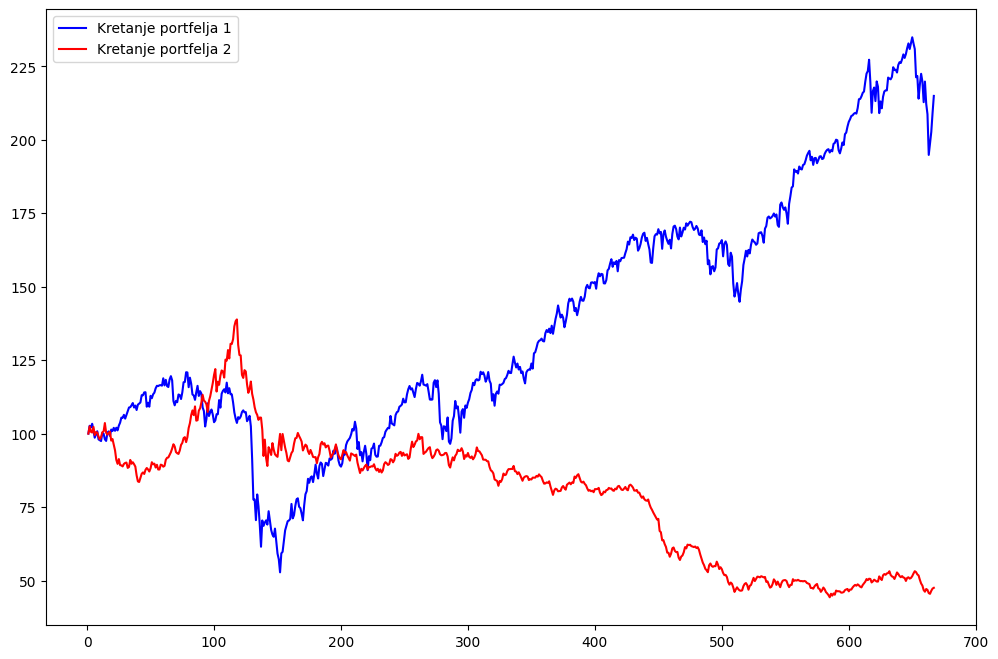

In [9]:
pocetni_ulog=100
kretanje_w1=[pocetni_ulog]
kretanje_w2=[pocetni_ulog]

for i in range(len(returns)):
    R=returns.iloc[i].values[1:]
    kretanje_w1.append(kretanje_w1[-1]+kretanje_w1[-1]*(np.sum(np.dot(R,w1_skalirano))))
    kretanje_w2.append(kretanje_w2[-1]+kretanje_w2[-1]*(np.sum(np.dot(R,w2_skalirano))))

plt.figure(figsize=(12, 8))
plt.plot(range(1, len(kretanje_w1)+1),kretanje_w1, label="Kretanje portfelja 1", c="b")
plt.plot(range(1, len(kretanje_w2)+1),kretanje_w2, label="Kretanje portfelja 2", c="r")  
plt.legend()
plt.show()


In [10]:
total_return = (kretanje_w1[-1] - kretanje_w1[0]) / kretanje_w1[0]
years = len(kretanje_w1) / 52
annualized_mean_w1 = ((1 + total_return) ** (1 / years)) - 1

total_return = (kretanje_w2[-1] - kretanje_w2[0]) / kretanje_w2[0]
years = len(kretanje_w2) / 52
annualized_mean_w2 = ((1 + total_return) ** (1 / years)) - 1

print("Anualizirana srednja vrijednost za portfolio w1 je: "+ str(annualized_mean_w1))
print("Anualizirana srednja vrijednost za portfolio w2 je: "+ str(annualized_mean_w2))

Anualizirana srednja vrijednost za portfolio w1 je: 0.061467683771468495
Anualizirana srednja vrijednost za portfolio w2 je: -0.05636007940997001


In [11]:
weekly_returns_w1 = np.diff(kretanje_w1) / kretanje_w1[:-1]
mean_return_w1 = np.mean(weekly_returns_w1)
n = len(weekly_returns_w1)
volatility_w1 = np.sqrt((1 / (n - 1)) * np.sum((weekly_returns_w1 - mean_return_w1) ** 2)) * np.sqrt(52)

weekly_returns_w2 = np.diff(kretanje_w2) / kretanje_w2[:-1]
mean_return_w2 = np.mean(weekly_returns_w2)
n = len(weekly_returns_w2)
volatility_w2 = np.sqrt((1 / (n - 1)) * np.sum((weekly_returns_w2 - mean_return_w2) ** 2)) * np.sqrt(52)

print("Volatilnos portfelja w1: "+str(volatility_w1))

print("Volatilnos portfelja w2: "+str(volatility_w2))

Volatilnos portfelja w1: 0.18108401108413696
Volatilnos portfelja w2: 0.12526238136328155


### 2. Faktorska analiza

#### (a)
Na danim podacima odredite broj faktora te provedite faktorsku analizu pomoću dvije različite metode. Procijenite parametre modela te ih usporedite. Koja procjena Vam se čini bolja? Što možete zaključiti iz vrijednosti faktora? Pronađite procjenu vrijednosti faktora koja daje najbolju interpretabilnost.

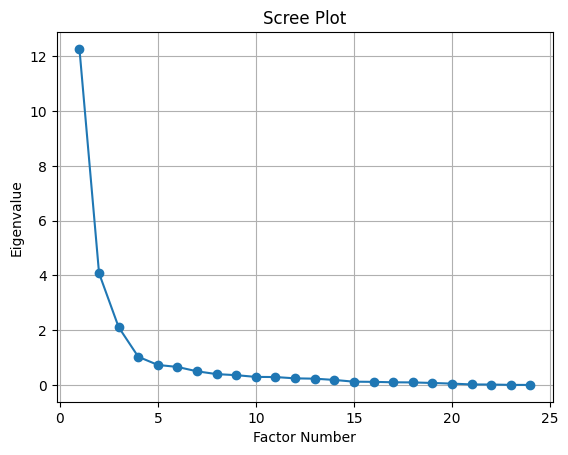

In [12]:
n_factors=24
fa = FactorAnalyzer(n_factors=n_factors, method='principal', rotation='varimax')
fa.fit(returns.drop(['time'], axis=1))
eigenvalues, _ = fa.get_eigenvalues()
plt.plot(range(1, n_factors+1), eigenvalues, 'o-')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

Pomoću scree plota odlučio sam da ću koristiti 3 faktora. 

In [28]:
fa = FactorAnalyzer(n_factors=3, method='principal')
fa.fit(returns.drop(['time'], axis=1))
faktori_pca=fa.loadings_
print("Faktori metodom glavnih komponenti")
print("Ovi faktori objašnjavaju "+str(fa.get_factor_variance()[2][-1]*100)+" % varijance.")
print(faktori_pca)

Faktori metodom glavnih komponenti
Ovi faktori objašnjavaju 76.14206186889001 % varijance.
[[ 2.44923141e-01  8.64755225e-01 -1.93054655e-02]
 [-1.70278761e-01  9.06649186e-01 -2.77652954e-02]
 [ 2.98610410e-01  8.33155483e-01 -7.86084108e-02]
 [-2.97450939e-01  6.54327221e-01  1.28271142e-01]
 [ 7.96797773e-02  8.49352010e-01  1.66201816e-01]
 [-1.79724782e-01  7.97526323e-01 -1.41372568e-01]
 [ 9.40589387e-02 -6.22683590e-02  9.05514695e-01]
 [-1.93264898e-01  2.21342534e-01  6.81834648e-01]
 [ 2.81748584e-02 -1.45164583e-01  8.45990505e-01]
 [ 9.27766090e-01 -5.46825655e-02  8.82198950e-02]
 [ 9.06533735e-01 -8.28819855e-02  5.02234285e-02]
 [ 9.72158191e-01 -1.90982208e-02  3.22846495e-02]
 [ 9.61703858e-01 -4.66057520e-02  2.14239937e-02]
 [ 7.75170513e-01 -9.07472212e-02  2.65039487e-01]
 [ 6.05229898e-01 -6.39350792e-02  5.07212761e-01]
 [ 8.58820095e-01 -9.25571457e-02 -9.68211249e-02]
 [ 9.15466012e-01 -8.86495610e-02  2.26094025e-02]
 [ 8.69631507e-01 -8.37481585e-02 -4.31158

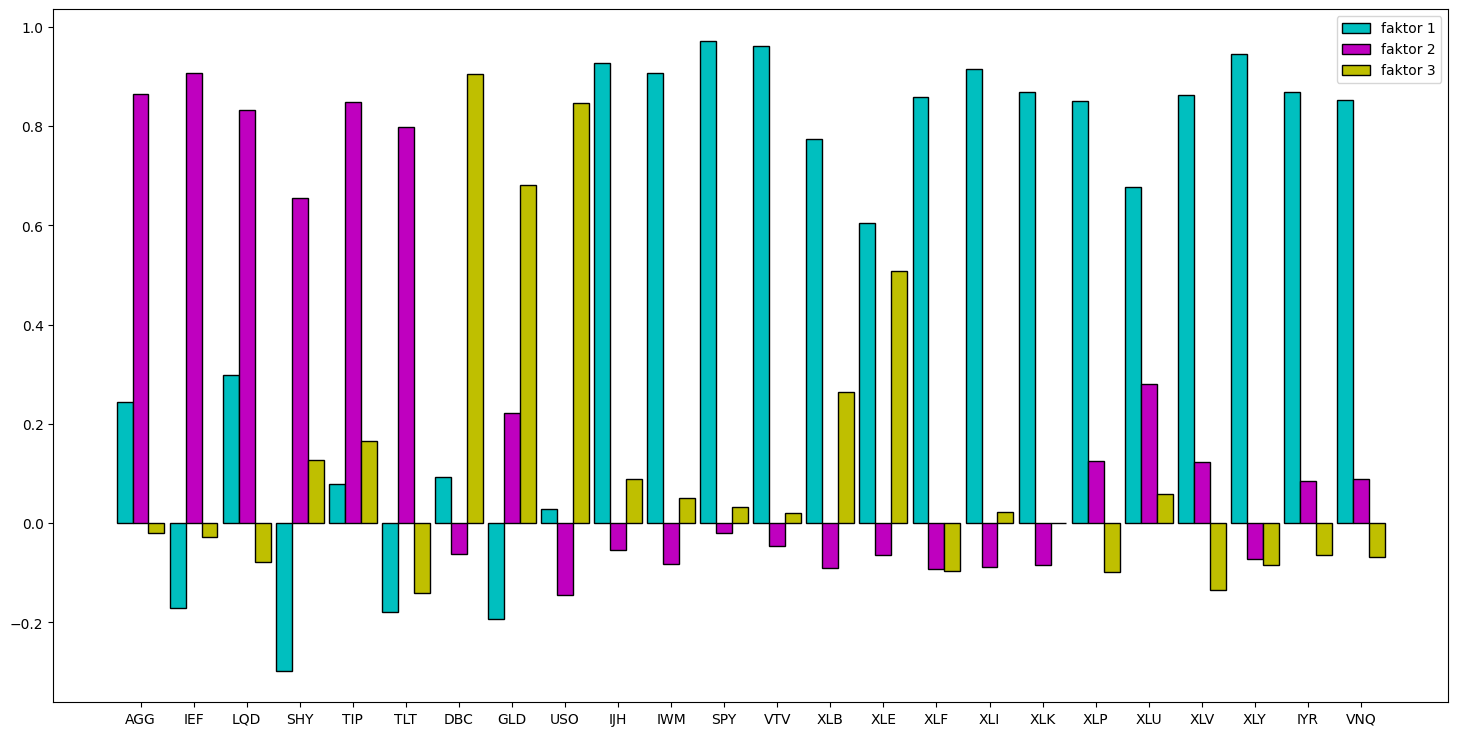

In [29]:
plt.figure(figsize=(18, 9))
X=np.array(range(1, 25))
plt.bar(X-0.3, faktori_pca[:,0], color ='c', width=0.3, edgecolor='k', label='faktor 1')
plt.bar(X, faktori_pca[:,1], color ='m',width=0.3, edgecolor='k',label='faktor 2')
plt.bar(X+0.3, faktori_pca[:,2], color ='y',width=0.3, edgecolor='k',label='faktor 3')
plt.xticks(range(1, 25), returns.columns[1:])
plt.legend()
plt.show()

Faktor 1 fokusira se na dionice, faktor 2 na obveznice a faktor 3 na sirovine i dionice tvrtki koje rade s materijalima i dionice tvrtki iz energetskog sektora.

In [15]:
fa = FactorAnalyzer(n_factors=3, method='ml')
fa.fit(returns.drop(['time'], axis=1))
faktori_ml=fa.loadings_
print("Faktori metodom najveće izglednosti")
print("Ovi faktori objašnjavaju "+str(fa.get_factor_variance()[2][-1]*100)+" % varijance.")
print(faktori_ml)

Faktori metodom najveće izglednosti
Ovi faktori objašnjavaju 65.5346160381012 % varijance.
[[ 0.29557253  0.82122481 -0.15531376]
 [-0.20839424  0.92572442 -0.01378001]
 [ 0.26080867  0.76266911 -0.07574213]
 [-0.20941438  0.6437652  -0.09768549]
 [ 0.07855043  0.77740726  0.01149337]
 [-0.31176344  0.79588062  0.0718639 ]
 [ 0.43627134 -0.06592958 -0.0475421 ]
 [-0.02629831  0.17319118  0.09037237]
 [ 0.37118092 -0.12071742 -0.06676904]
 [ 0.86135005 -0.02543654  0.17218578]
 [ 0.82358421 -0.05369961  0.17884614]
 [ 0.98908613  0.03342724  0.02792128]
 [ 0.93520246 -0.0020817   0.0890521 ]
 [ 0.82700589 -0.0539702   0.08165181]
 [ 0.86060287 -0.01588046 -0.10087171]
 [ 0.68984604 -0.07255363  0.24923801]
 [ 0.8947617  -0.04171153  0.07276607]
 [ 0.92854937 -0.00230798 -0.04521249]
 [ 0.79722005  0.14947558  0.02335303]
 [ 0.63235238  0.25217697  0.05232759]
 [ 0.90323207  0.17096504 -0.12818741]
 [ 0.82492847 -0.02603766  0.17924978]
 [ 0.34919251 -0.01020363  0.77754579]
 [ 0.3137738

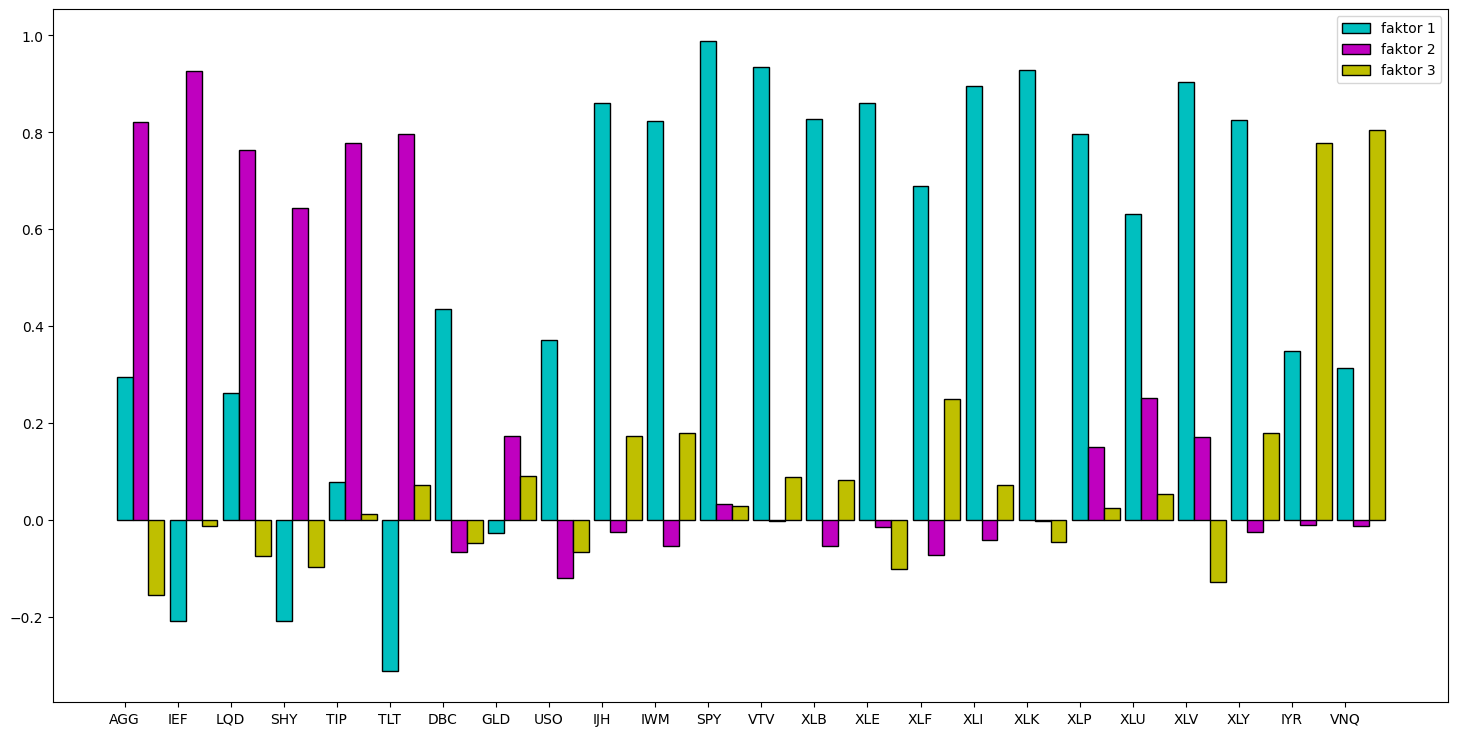

In [16]:
plt.figure(figsize=(18, 9))
X=np.array(range(1, 25))
plt.bar(X, faktori_ml[:,0], color ='c', width=0.3, edgecolor='k', label='faktor 1')
plt.bar(X+0.3, faktori_ml[:,1], color ='m',width=0.3, edgecolor='k',label='faktor 2')
plt.bar(X+0.6, faktori_ml[:,2], color ='y',width=0.3, edgecolor='k',label='faktor 3')
plt.xticks(range(1, 25), returns.columns[1:])
plt.legend()
plt.show()

Faktori procjenjeni s ML: faktor 1 fokusira se na dionice, faktor 2 na obveznice, a faktor 3 na nekretnine. Nijedan od prva 3 faktora ne fokusira se na sirovine zlato i naftu pa je to vjerojatno razlog zašto ml procjena daje lošije rezultate.

#### (b)
Izračunajte specifične varijance faktora za model s dva faktora i model s tri faktora. Pomoću stupčastog dijagrama prikažite i usporedite dobivene vrijednosti. 

Text(0.5, 1.0, 'Specific Variances of Variables for 3 factors')

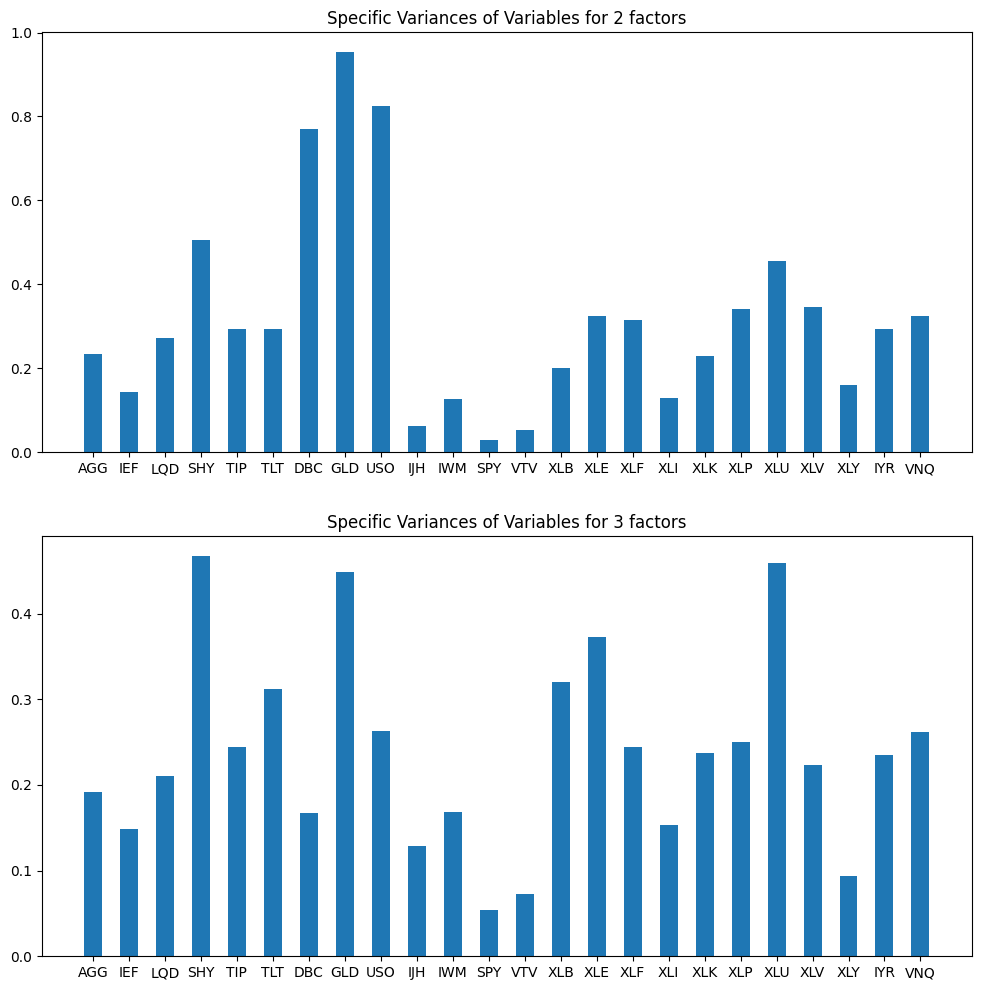

In [17]:
fa = FactorAnalyzer(n_factors=2, method='principal')
fa.fit(returns.drop(['time'], axis=1))
specific_variances = fa.get_uniquenesses()

plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.bar(range(1, 25), specific_variances, width=0.5, label='Specifične varijance')
plt.xticks(range(1, 25), returns.columns[1:])
plt.title('Specific Variances of Variables for 2 factors')


fa = FactorAnalyzer(n_factors=3, method='principal')
fa.fit(returns.drop(['time'], axis=1))
specific_variances = fa.get_uniquenesses()

plt.subplot(2, 1, 2)
plt.bar(range(1, 25), specific_variances, width=0.5, label='Specifične varijance')
plt.xticks(range(1, 25), returns.columns[1:])
plt.title('Specific Variances of Variables for 3 factors')

S 2 faktora najveće specifične varijance imaju sirovine zlati i nafta, to je tako ejr se prva 2 faktora fokusiraju na obveznice tj. dionice, dolaskom trećeg faktora vidimo da specifične varijance za njih padaju jer ih sad faktor 3 objašnjava.

### 3. Multivarijatna linearna regresija

#### (a)
Provedite 3 univarijatne linearne regresije koristeći povrate ETF-ova `AGG`, `DBC` i `SPY` kao zavisne varijable. Svaku regresiju provedite sa svim preostalim povratima ETF-ova kao nezavnim varijablama. Za svaku regresiju ispišite koeficijente te njihovu signifikantnost.

In [18]:
X_1 = returns.drop(['time', 'AGG'], axis=1)
X_1 = sm.add_constant(X_1)
y_1 = returns['AGG']
print("Za model sa zavisnom varijablom AGG")
model = sm.OLS(y_1, X_1).fit()
print(model.summary())

X_2 = returns.drop(['time', 'DBC'], axis=1)
X_2 = sm.add_constant(X_2)
y_2 = returns['DBC']
print("\n\nZa model sa zavisnom varijablom DBC")
model = sm.OLS(y_2, X_2).fit()
print(model.summary())

X_3 = returns.drop(['time', 'SPY'], axis=1)
X_3 = sm.add_constant(X_3)
y_3 = returns['SPY']
print("\n\nZa model sa zavisnom varijablom SPY")
model = sm.OLS(y_3, X_3).fit()
print(model.summary())

Za model sa zavisnom varijablom AGG
                            OLS Regression Results                            
Dep. Variable:                    AGG   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     94.93
Date:                Sun, 07 May 2023   Prob (F-statistic):          3.79e-189
Time:                        18:40:28   Log-Likelihood:                 2864.6
No. Observations:                 666   AIC:                            -5681.
Df Residuals:                     642   BIC:                            -5573.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0

#### (b)
Provedite multivarijatnu linearnu regresiju koristeći ETF-ove `AGG`, `DBC` i `SPY` kao zavisne varijable. Za nezavisne varijable uzmite sve preostale ETF-ove. Ispišite signifikantnost koeficijenata multivarijatne regresije. 

In [19]:
X_m= returns.drop(['time', 'AGG', 'SPY', 'DBC'], axis=1)
X_m= sm.add_constant(X_m)
y_m = returns[['AGG', 'SPY', 'DBC']]

model = SUR.multivariate_ls(y_m, X_m)
res= model.fit()
print(res.summary)

                           System OLS Estimation Summary                           
Estimator:                        OLS   Overall R-squared:                   0.9017
No. Equations.:                     3   McElroy's R-squared:                 0.9844
No. Observations:                 666   Judge's (OLS) R-squared:             0.9017
Date:                Sun, May 07 2023   Berndt's R-squared:                  0.9997
Time:                        18:40:28   Dhrymes's R-squared:                 0.9017
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: AGG, Dependent Variable: AGG                    
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const      -5.802e-05     0.0002    -0.3058     0.7598     -0.0004      0.0003
IEF         

P-vrijednosti pokazuju da treba zadržati značajke LQD, XLE, XLU.

#### (c)
Ponovite proceduru iz (b), ali zadržite samo varijable s koeficijentima na 0.05 razini signifikantnosti. Usporedite ovaj model s modelom iz (b).  Je li izbacivanje varijabli dovelo do pogoršanja modela?


In [31]:
X_m= returns[['LQD', 'XLE', 'XLU']]
X_m= sm.add_constant(X_m)
y_m = returns[['AGG', 'SPY', 'DBC']]


model = SUR.multivariate_ls(y_m, X_m)
res= model.fit()
print(res.summary)

                           System OLS Estimation Summary                           
Estimator:                        OLS   Overall R-squared:                   0.5923
No. Equations.:                     3   McElroy's R-squared:                 0.6757
No. Observations:                 666   Judge's (OLS) R-squared:             0.5923
Date:                Sun, May 07 2023   Berndt's R-squared:                  0.9296
Time:                        19:30:11   Dhrymes's R-squared:                 0.5923
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                    Equation: AGG, Dependent Variable: AGG                    
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
const          0.0002     0.0003     0.7712     0.4406     -0.0003      0.0007
LQD         

R-squared se smanjio što znaći da je sad postotak varijance u zavisnim varijablamakoji objašnjavaju nezavisne varijable manji nego ranije,

### 4. Kanonička korelacijska analiza

Za potrebe ovog zadatka standardizirajte podatke i podijelite skup ETF-ova na dva skupa tako da: 
- prvi skup sadrži: `AGG`, `LQD`, `TIP` ,`DBC`, `USO`,`IWM`, `VTV`, `XLE`, `XLI`, `XLP`, `XLV`, `IYR`,  
- drugi skup sadrži: `IEF`, `LQD`, `SHY`, `TLT`, `GLD`, `IJH`,`SPY`, `XLB`, `XLF`, `XLK`, `XLU`,`XLY`, `VNQ`.


In [21]:
scaler=StandardScaler()
scaled_returns=pd.DataFrame(scaler.fit_transform(returns.drop(['time'], axis=1)), columns=returns.drop(['time'], axis=1).columns)

skup1=scaled_returns[['AGG', 'LQD', 'TIP' ,'DBC', 'USO','IWM', 'VTV', 'XLE', 'XLI', 'XLP', 'XLV', 'IYR']]
skup2=scaled_returns[['IEF', 'LQD', 'SHY', 'TLT', 'GLD', 'IJH','SPY', 'XLB', 'XLF', 'XLK', 'XLU','XLY', 'VNQ']]

#### (a) 
Provedite kanoničku korelacijsku analizu s maksimalnim brojem parova kanoničkih varijabli. Koliko kanoničkih parova je statistički značajno? 

In [22]:
br_parova=min(skup1.shape[1], skup2.shape[1])
cca = CCA(n_components=br_parova)
cca.fit(skup1, skup2)
X_c, Y_c = cca.transform(skup1, skup2)

p= skup1.shape[1]
q= skup2.shape[1]
n= skup1.shape[0]

alfa=0.05

korelacije_cca=[]
for i in range(0, br_parova):
  korelacije_cca.append(np.corrcoef(X_c[:, i], Y_c[:, i])[0][1])

korelacije_cca=np.asarray(korelacije_cca)

print("t>hi_2 -> odbacujemo H0")
znacajni=0
for k in range (0, br_parova):
  
  barlett = -(n-1-0.5*(p+q+1))*np.log(np.prod(1-korelacije_cca[k:]**2))
  hi_2=chi2.ppf(1-alfa, (p-k)*(q-k))

  if (barlett < hi_2):
    print("Par "+str(k+1)+": "+str(barlett)+" < "+str(hi_2)+"-> NE ODBACUJEMO H0")
  else:
    print("Par "+str(k+1)+": "+str(barlett)+" > "+str(hi_2)+"-> ODBACUJEMO H0")
    znacajni+=1

print("\nIma "+ str(znacajni)+" znacajnih parova.")    

t>hi_2 -> odbacujemo H0
Par 1: 12597.90356048482 > 186.14575078141743-> ODBACUJEMO H0
Par 2: 7723.071994258852 > 159.8135468509978-> ODBACUJEMO H0
Par 3: 4248.11313179874 > 135.48017792835952-> ODBACUJEMO H0
Par 4: 2046.1704287733505 > 113.1452701425554-> ODBACUJEMO H0
Par 5: 1284.5948044847673 > 92.80827038310771-> ODBACUJEMO H0
Par 6: 803.9553684230661 > 74.46832415930936-> ODBACUJEMO H0
Par 7: 428.99088517368193 > 58.12403768086803-> ODBACUJEMO H0
Par 8: 167.60178339100227 > 43.77297182574219-> ODBACUJEMO H0
Par 9: 87.66106237019932 > 31.410432844230918-> ODBACUJEMO H0
Par 10: 26.143969445166267 > 21.02606981748307-> ODBACUJEMO H0
Par 11: 5.820844446304538 < 12.591587243743977-> NE ODBACUJEMO H0
Par 12: 1.13122630203113 < 5.991464547107979-> NE ODBACUJEMO H0

Ima 10 znacajnih parova.


#### (b)
Pomoću *scree plota* prikažite korelacije dobivenih parova kanoničkih varijabli. 

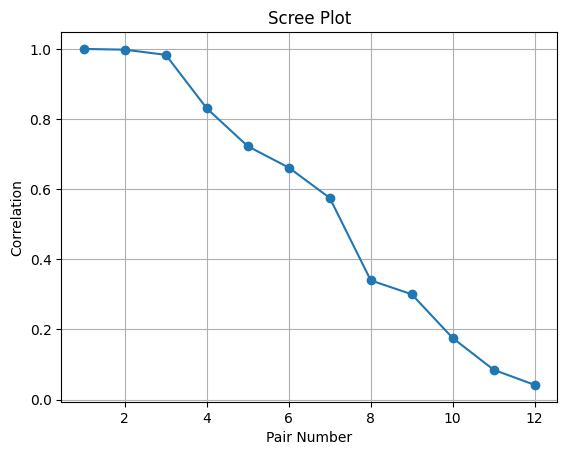

In [23]:
plt.plot(range(1, br_parova+1), korelacije_cca, 'o-')
plt.xlabel('Pair Number')
plt.ylabel('Correlation')
plt.title('Scree Plot')
plt.grid()
plt.show()

#### (c)
Promotrite korelacije između kanoničkih varijabli i originalnih varijabli kako bi interpretirali kanoničke varijable u terminima originalnih. Za svaki skup posebno pomoću stupčastog dijagrama prikažite korelacije originalnih varijabli i prva tri para kanoničkih varijabli (slično kao u zadatku 1.(b)). 

**Hint**: Interpretacija populacijskih kanoničkih varijabli (Predavanje 7)

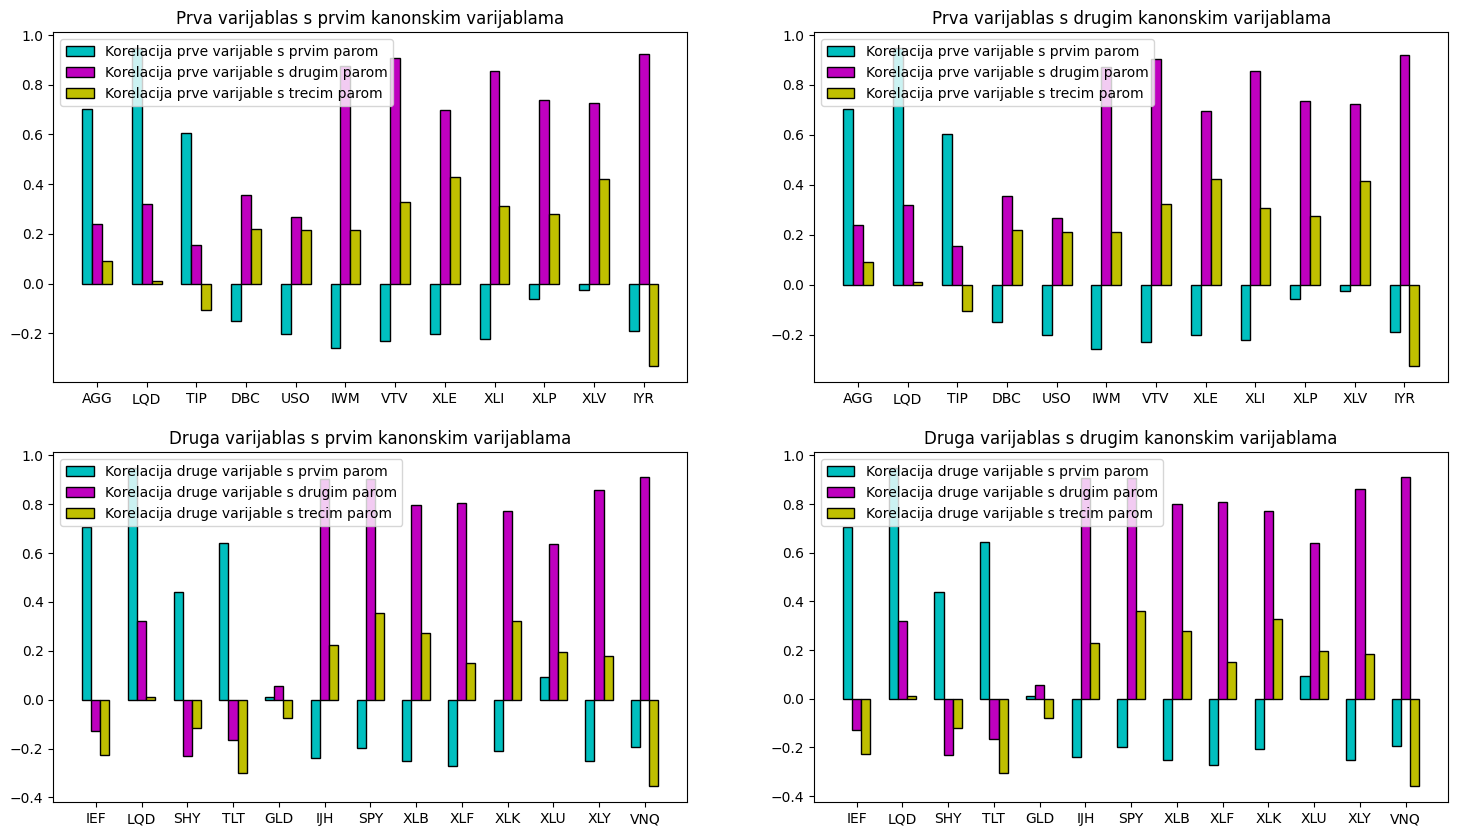

In [24]:
korelacije_skup1_1=[]
korelacije_skup1_2=[]
korelacije_skup1_3=[]

korelacije_skup2_1=[]
korelacije_skup2_2=[]
korelacije_skup2_3=[]

for s in skup1.columns:
  korelacije_skup1_1.append(np.corrcoef(skup1[s], X_c[:, 0])[0][1])
  korelacije_skup1_2.append(np.corrcoef(skup1[s], X_c[:, 1])[0][1])
  korelacije_skup1_3.append(np.corrcoef(skup1[s], X_c[:, 2])[0][1])

for s in skup2.columns:
  korelacije_skup2_1.append(np.corrcoef(skup2[s], Y_c[:, 0])[0][1])
  korelacije_skup2_2.append(np.corrcoef(skup2[s], Y_c[:, 1])[0][1])
  korelacije_skup2_3.append(np.corrcoef(skup2[s], Y_c[:, 2])[0][1])  

korelacije_skup12_1=[]
korelacije_skup12_2=[]
korelacije_skup12_3=[]

korelacije_skup21_1=[]
korelacije_skup21_2=[]
korelacije_skup21_3=[]

for s in skup1.columns:
  korelacije_skup12_1.append(np.corrcoef(skup1[s], Y_c[:, 0])[0][1])
  korelacije_skup12_2.append(np.corrcoef(skup1[s], Y_c[:, 1])[0][1])
  korelacije_skup12_3.append(np.corrcoef(skup1[s], Y_c[:, 2])[0][1])

for s in skup2.columns:
  korelacije_skup21_1.append(np.corrcoef(skup2[s], X_c[:, 0])[0][1])
  korelacije_skup21_2.append(np.corrcoef(skup2[s], X_c[:, 1])[0][1])
  korelacije_skup21_3.append(np.corrcoef(skup2[s], X_c[:, 2])[0][1])


plt.figure(figsize=(18, 10))
X=np.array(range(1,13))
plt.subplot(2, 2, 1)
plt.bar(X-0.2, korelacije_skup1_1, label="Korelacija prve varijable s prvim parom", color='c', edgecolor='black', width=0.2)
plt.bar(X, korelacije_skup1_2, label="Korelacija prve varijable s drugim parom", color='m', edgecolor='black',width=0.2)
plt.bar(X+0.2, korelacije_skup1_3, label="Korelacija prve varijable s trecim parom", color='y', edgecolor='black',width=0.2)
plt.xticks(range(1, 13), skup1.columns)
plt.legend(loc='best')
plt.title("Prva varijabla s prvim kanonskim varijablama")


X=np.array(range(1,13))
plt.subplot(2, 2, 2)
plt.bar(X-0.2, korelacije_skup12_1, label="Korelacija prve varijable s prvim parom", color='c', edgecolor='black', width=0.2)
plt.bar(X, korelacije_skup12_2, label="Korelacija prve varijable s drugim parom", color='m', edgecolor='black',width=0.2)
plt.bar(X+0.2, korelacije_skup12_3, label="Korelacija prve varijable s trecim parom", color='y', edgecolor='black',width=0.2)
plt.xticks(range(1, 13), skup1.columns)
plt.legend(loc='best')
plt.title("Prva varijabla s drugim kanonskim varijablama")


X=np.array(range(1,14))
plt.subplot(2, 2, 3)
plt.bar(X-0.2, korelacije_skup21_1, label="Korelacija druge varijable s prvim parom", color='c', edgecolor='black', width=0.2)
plt.bar(X, korelacije_skup21_2, label="Korelacija druge varijable s drugim parom", color='m', edgecolor='black',width=0.2)
plt.bar(X+0.2, korelacije_skup21_3, label="Korelacija druge varijable s trecim parom", color='y', edgecolor='black',width=0.2)
plt.xticks(range(1, 14), skup2.columns)
plt.legend(loc='best')
plt.title("Druga varijabla s prvim kanonskim varijablama")

X=np.array(range(1,14))
plt.subplot(2, 2, 4)
plt.bar(X-0.2, korelacije_skup2_1, label="Korelacija druge varijable s prvim parom", color='c', edgecolor='black', width=0.2)
plt.bar(X, korelacije_skup2_2, label="Korelacija druge varijable s drugim parom", color='m', edgecolor='black',width=0.2)
plt.bar(X+0.2, korelacije_skup2_3, label="Korelacija druge varijable s trecim parom", color='y', edgecolor='black',width=0.2)
plt.xticks(range(1, 14), skup2.columns)
plt.legend(loc='best')
plt.title("Druga varijabla s drugim kanonskim varijablama")
plt.show()

Prva varijabla snažno korelira s prvim paraom kod obveznica, s drugim kod dionica, a sa trećim malo sa sirovinama i naftom i malo sa dionicam trrki drugog i trećeg sektora. Ista situacija je i za drugi par kanonskih varijabli.

Druga varijabla snažno korelira sa prvim paraom kod obveznica, sa drugim parom kod dionica, a treći apr slabo korelira s nekim dionicam i negativno sa obveznicama. Ista situacija i kod korelacije drugie varijable s prvom kanonskom varijablom.

Razlog tome je to što oba skupa imaju sličnu podjelu tipa fondova pa jer sadrže sličan broj obveznica, dionica i materijala.



